In [1]:
import os
# Only for first run after kernel restart
os.chdir('..')

In [2]:
from src.utils import *
from src.v2.config import *
import pandas as pd
import src.utils as utils
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import label  
from PIL import Image
import cv2
import torch
from torch.utils import data
from src.v2.data import AirbusSegmentation


In [3]:
data = pd.read_csv('data/processed_v2.csv')

In [4]:
ships = data[data.ships != 0]

In [31]:
ds = AirbusSegmentation(ships[['ImageId', 'mask_nb', 'border']], img_size=768)

In [7]:
from src.v2.models.albunet_v2 import load_model

In [57]:
model, state = load_model('last_seg_v2.pth')

Albunet v2 is loading!
Trainable Parameters: 37184618


In [63]:
im, gt_mask, has_ship = ds[500]

In [64]:
has_ship

tensor(1, dtype=torch.uint8)

In [65]:
out = model(im.unsqueeze(0).to(DEVICE)).cpu()

In [71]:
imshow(gt_mask[:, :, :1])

ValueError: operands could not be broadcast together with shapes (3,) (768,1,2) 

In [66]:
mask = out[0, 0, :, :] > 0.5
border = out[0, 1, :, :] > 0.5

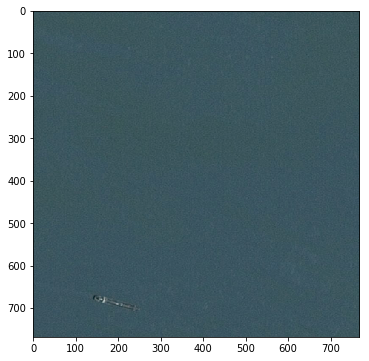

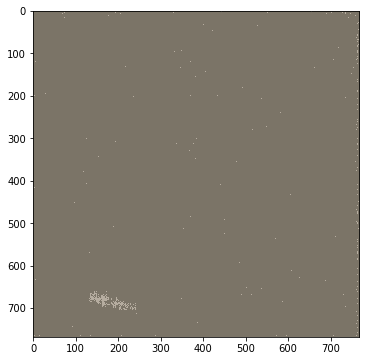

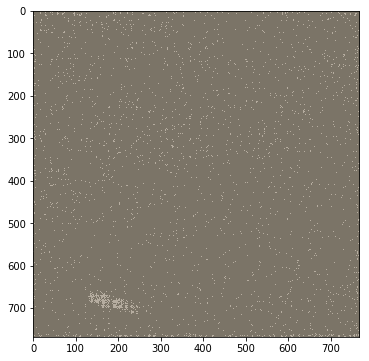

In [67]:
imshow(im)
plt.show()
imshow(mask.unsqueeze(0))
plt.show()
imshow(border.unsqueeze(0))

In [37]:
s2 = pd.read_csv('submission0.910.csv')

In [38]:
masks2 = s2[~s2.EncodedPixels.isna()]